In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
pwd

'/home/pi/Share/jupyter'

In [3]:
train_path = '/home/pi/Share/jupyter/rps'

In [4]:
train_files_0 = os.listdir(train_path + '/0/')
train_files_1 = os.listdir(train_path + '/1/')
train_files_2 = os.listdir(train_path + '/2/')

In [5]:
l = len(train_files_0)
for i in range(l):
    train_files_0[i] = train_path + '/0/'+train_files_0[i]

l = len(train_files_1)
for i in range(l):
    train_files_1[i] = train_path + '/1/'+train_files_1[i]
    
l = len(train_files_2)
for i in range(l):
    train_files_2[i] = train_path + '/2/'+train_files_2[i]

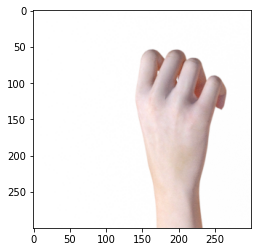

In [6]:
plt.imshow(plt.imread(train_files_1[0]))

In [7]:
# allFiles =  train_files_0+train_files_1+train_files_2

In [8]:
# w = []
# h = []
# for a in allFiles:
#     img = plt.imread(a)
#     w.append(img.shape[0])
#     h.append(img.shape[1])

In [9]:
# np.mean(w)

In [10]:
# np.mean(h)

In [11]:
# sns.jointplot(w, h)

In [12]:
image_shape = (100,100,3)

In [13]:
image_gen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.3 )

In [14]:
image_gen.flow_from_directory(train_path)

Found 2520 images belonging to 3 classes.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (2,2), input_shape = image_shape, activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Conv2D(filters = 64, kernel_size = (2,2), input_shape = image_shape, activation = 'relu' ))
model.add(MaxPool2D(pool_size = (2,2) ))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))


model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
batch_size = 16

In [18]:
train_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size = image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='sparse',
                                              subset="training"                                               
                                             )

Found 1764 images belonging to 3 classes.


In [19]:
validation_img_gen = image_gen.flow_from_directory(train_path,
                                              target_size = image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='sparse',
                                              subset="validation",
                                              shuffle=False                                                   
                                             )

Found 756 images belonging to 3 classes.


In [20]:
# validation_img_gen.class_indices

In [21]:
# train_img_gen.class_indices

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [23]:
pwd

'/home/pi/Share/jupyter'

In [24]:
ckp_path = '/home/pi/Share/jupyter/checkpoint/cp-{epoch:04d}.cpkt'

In [26]:
cp_callback  = ModelCheckpoint(ckp_path, save_weights_only=True, verbose=0,period=1)

In [33]:
def num():
    print(1)

In [36]:
model.fit(train_img_gen,
          epochs = 10, 
          steps_per_epoch = len(train_img_gen) // batch_size , 
          validation_data=validation_img_gen) #, callbacks=[cp_callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 48 steps
Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 1.3507 - accuracy: 0.3333 - val_loss: 1.0859 - val_accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 1.0665 - accuracy: 0.3646 - val_loss: 1.0893 - val_accuracy: 0.4392
Epoch 3/10
6/6 [==============================] - 14s 2s/step - loss: 1.0316 - accuracy: 0.5208 - val_loss: 1.0057 - val_accuracy: 0.5026
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.9427 - accuracy: 0.5938 - val_loss: 0.9351 - val_accuracy: 0.5132
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 0.8159 - accuracy: 0.7604 - val_loss: 0.9962 - val_accuracy: 0.3981
Epoch 6/10
6/6 [==============================] - 14s 2s/step - loss: 0.7888 - accuracy: 0.6458 - val_loss: 0.8501 - val_accuracy: 0.5556
Epoch 7/10
6/6 [==============================] - 14s 2s/step - loss: 0.6160 - ac

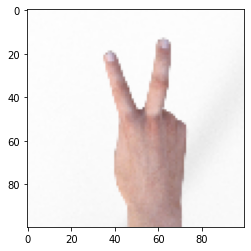

In [37]:
test_path = '/home/pi/Share/jupyter/rps-test-set'

test_files_paper = os.listdir(test_path + '/paper')
test_files_rock = os.listdir(test_path + '/rock') 
test_files_scissors = os.listdir(test_path + '/scissors') 

l = len(test_files_paper)
for i in range(l):
    test_files_paper[i] = test_path + '/paper/' + test_files_paper[i]

l = len(test_files_rock)
for i in range(l):
    test_files_rock[i] = test_path + '/rock/' + test_files_rock[i]
    
l = len(test_files_scissors)
for i in range(l):
    test_files_scissors[i] = test_path + '/scissors/' + test_files_scissors[i]
    
test_files = test_files_paper+ test_files_rock+test_files_scissors
l = len(test_files)

t = np.random.randint(0, l-1)
f = test_files[t]
my_image = image.load_img(f, target_size=(100,100))
# my_img_arr = image.img_to_array(my_image)
# img_arr = np.expand_dims(my_img_arr, axis = 0)
# res = list(model.predict(img_arr)[0])
# if res[0] == max(res):
#     print('Paper')
# elif res[1] == max(res):
#     print('Rock')
# elif res[2] == max(res):
#     print('Scissor')
plt.imshow(my_image)

Rock


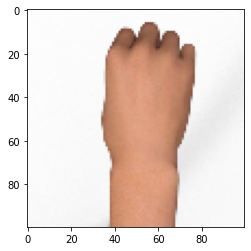

In [48]:
test_path = '/home/pi/Share/jupyter/rps-test-set'

test_files_paper = os.listdir(test_path + '/paper')
test_files_rock = os.listdir(test_path + '/rock') 
test_files_scissors = os.listdir(test_path + '/scissors') 

l = len(test_files_paper)
for i in range(l):
    test_files_paper[i] = test_path + '/paper/' + test_files_paper[i]

l = len(test_files_rock)
for i in range(l):
    test_files_rock[i] = test_path + '/rock/' + test_files_rock[i]
    
l = len(test_files_scissors)
for i in range(l):
    test_files_scissors[i] = test_path + '/scissors/' + test_files_scissors[i]
    
test_files = test_files_paper+ test_files_rock+test_files_scissors
l = len(test_files)


t = np.random.randint(0, l-1)
f = test_files[t]
my_image = image.load_img(f, target_size=image_shape)
my_img_arr = image.img_to_array(my_image)
img_arr = np.expand_dims(my_img_arr, axis = 0)
res = list(model.predict(img_arr)[0])
if res[0] == max(res):
    print('Paper')
elif res[1] == max(res):
    print('Rock')
elif res[2] == max(res):
    print('Scissor')

plt.imshow(my_image)